Welcome to the Data Science take-home challenge! The goal of the challenge is to give us an idea of how you work through data science analyses, and gauge your familiarity with common data science tools. We hope the challenge will also provide a flavor of the types of problems the team works on!

Please fill in your responses in the cells below. We ask that you submit this notebook as an email attachment within two hours of the time you receive our email. 

At Datavant we use `numpy`, `pandas` and `matplotlib` for the majority of our exploratory work, and this test is designed around those libraries. If you are not yet comfortable with the Python data science ecosystem, feel free to solve this challenge using the Python libraries of your choice.

In cases where there may be multiple ways to answer a question, use your judgment as to what makes the most sense.

The test will be graded as follows:
- Questions 1–4: 34%
- Questions 5–6: 33%
- Statistics and Probability Theory Questions: 33%

## Data Processing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The data you will be working with is in the same ZIP file as this IPython notebook. Your first task is to load this data into a `pandas.DataFrame`  and inspect it. To check that you've done this right, the data frame should contain the following information about a list of patients:
```
{
  'first_name': First name of the patient,
  'last_name': Last name of the patient,
  'gender': Gender of the patient (M or F),
  'yob': Year of birth of the patient,
  'zip3': 3 digit zip of the patient's address,
  'state': Two letter abbreviation for the state,
  'patient_id': Hash representing a unique patient ID
}
```

In [5]:
def read_data(filename):
  # TODO: Fill in this function with your solution
  return pd.read_csv(filename)

FILENAME = "data_science_take_home_data (1).csv"
df = read_data(FILENAME)

In [12]:
df.shape

(50000, 7)

In [6]:
df.head()

,first_name,last_name,gender,yob,zip3,state,patient_id
0,Larry,Feinstein,male,1989.0,334.0,Florida,C0A6o_gk7xGBU23JxCq1AQ
1,John,Thomas,male,1978.0,354.0,Alabama,RPigmAzbWCqwPLFK2iQFgg
2,Rebecca,Shinault,female,1971.0,NaN,Arizona,jyClh4QrdtWzlBAEkGgzVw
3,James,Dotolo,male,2003.0,NaN,Georgia,rNGpYoLJGcSfDUCTESAGLQ
4,Martha,Higdon,female,NaN,32.0,New Hampshire,ETiPDfl1Qmg_9YeFm0B3mA


The first few questions are about exploring and cleaning up the data. We leave it up to you how you go about solving these.

1.   How many distinct first names are in the dataset? How about last names?
2.   Are there any duplicates in the dataset? Two examples are considered identical if they have identical values across all fields. 
3.   Are there any patients with the same `patient_id`, but different data values?
4.   Are there any data errors in the year-of-birth field? Explain what these errors are and replace those fields with `NaN`.


In [179]:
# TODO: Write out answers to the questions above.
df = read_data(FILENAME)
# 1
print(f"number of unique first names: {df['first_name'].nunique()}")
print(f"number of unique last names: {df['last_name'].nunique()}")

# 2
duplicates = df.shape[0] - df.drop_duplicates(subset=df.columns.values).shape[0]
print(f"number of duplicate rows: {duplicates}")

# 3
# first filter for more than 1 instance of patient_id
# then drop anything that is a duplicate across all columns
dup_df = df.groupby("patient_id").filter(lambda x: len(x) > 1).drop_duplicates(subset=df.columns, keep='first')
# dup_df will contain rows where there is now only 1 instance
# of the paitent_id; those cases did NOT have other fields that
# were different, so we need to drop them
patients_with_conflict_vals = dup_df.groupby('patient_id').filter(lambda x: len(x) > 1)['patient_id'].nunique()
print(f"number of patient_ids with conflicts in other data fields: {patients_with_conflict_vals}")

# 4
# some of the errors: negative years, years greater than the current year
print()
print(df['yob'].describe())
print()
print(f"number of negative yob: {df.loc[df['yob'] < 0].shape[0]}")
print(f"number of future yob: {df.loc[df['yob'] > 2022].shape[0]}")
df.loc[df['yob'] < 0] = np.nan
df.loc[df['yob'] > 2022] = np.nan

# since these are american patients, we might also assume that anyone
# born before 1776 or thereabouts is a false yob!!! (could in actuality
# be more restrictive here but let's assume we might have some data
# that is ancient history)
print(f"number of ridiculously old yob: {df.loc[df['yob'] < 1776].shape[0]}")
df.loc[df['yob'] < 1776] = np.nan

number of unique first names: 3284
number of unique last names: 15064
number of duplicate rows: 371
number of patient_ids with conflicts in other data fields: 2002

count    40087.000000
mean      1920.703345
std        416.199166
min      -2003.000000
25%       1958.000000
50%       1974.000000
75%       1989.000000
max       2070.000000
Name: yob, dtype: float64

number of negative yob: 433
number of future yob: 762
number of ridiculously old yob: 735


We often run into datasets that are biased in certain ways. The next few questions explore whether there is any bias in the dataset we're working with.

5.  How many patients come from each state?
6.  Using the 2022 population data at https://worldpopulationreview.com/states, determine if the data in our sample follows the same distribution.

California              5775
Texas                   3686
Florida                 2926
New York                2783
Illinois                2135
Pennsylvania            1965
Ohio                    1780
New Jersey              1613
Michigan                1612
Georgia                 1509
North Carolina          1503
Virginia                1192
Arizona                 1074
Massachusetts           1039
Indiana                  995
Washington               957
Tennessee                940
Wisconsin                908
Maryland                 894
Missouri                 874
Alabama                  835
Colorado                 812
Minnesota                737
South Carolina           736
Kentucky                 695
Louisiana                663
Oklahoma                 640
Oregon                   612
Iowa                     589
Arkansas                 577
Connecticut              530
Kansas                   470
Mississippi              434
New Mexico               423
Utah          

,Patient Data,Pop
State,,
California,0.120365,0.118016
Texas,0.076825,0.089552
Florida,0.060985,0.065988
New York,0.058005,0.057197
Pennsylvania,0.040955,0.038100


<AxesSubplot:xlabel='State'>

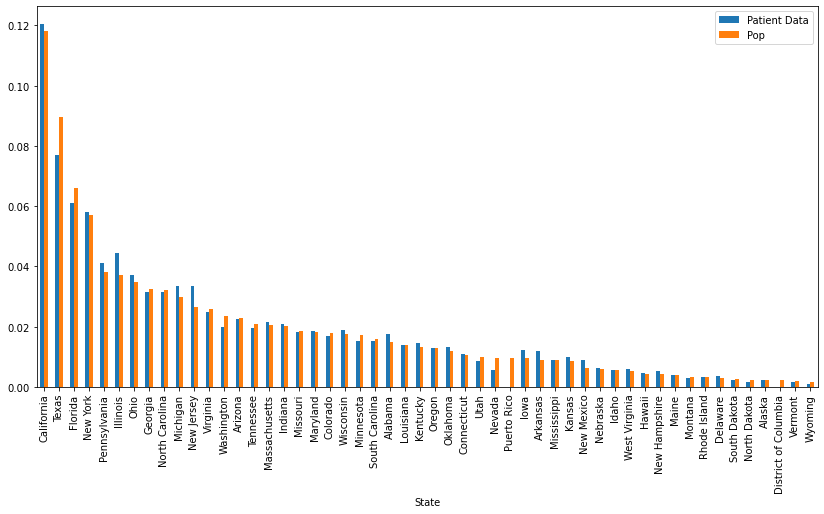

In [182]:
# TODO: Write out answers to the questions above
# 5
print(df['state'].value_counts())

# 6
# I'd say the distributions are roughly the same, with the exception of
# utah, nevada, puerto rico and DC; where there seem to be a bit of 
# patient data missing
df2 = pd.read_csv("csvData.csv", index_col='State')
df2['Patient Data'] = df['state'].value_counts()
df2 = df2[['Patient Data', 'Pop']]
df2['Patient Data'] = df2['Patient Data'] / df2['Patient Data'].sum()
df2['Pop'] = df2['Pop'] / df2['Pop'].sum()
display(df2.head())

fig, ax = plt.subplots(figsize=(14,7))
df2.plot(kind='bar', ax=ax)

## Statistics and Probability Theory

1.  You are given a random number generator that samples uniformly in the range [0, 1]. Estimate the area of the unit circle. Explain, as best you can, what the approximation error of your solution is.

In [245]:
# TODO: Write out answer to the question above
x, y = np.random.random(size=(2,10000000))

# True is outside the circle (so square)
labels, counts = np.unique(np.sqrt((x**2+y**2)) > 1, return_counts=True)

# first number count of circle, second count of square ONLY
print(labels, counts)

# circle = pi r ** 2 = pi (r = 1)
# square = d ** 2 = 2 **2 = 4
# so circle / square = pi / 4
# circle / square * 4 = pi

# ratio of circle samples / square samples (all) * 4
counts[0]/(counts.sum())*4

[False  True] [7852994 2147006]


3.1411976

The error quickly falls off the larger values of n we use:

In [248]:
def est_pi(n=10):
    # TODO: Write out answer to the question above
    x, y = np.random.random(size=(2,n))

    # True is outside the circle (so square)
    labels, counts = np.unique(np.sqrt((x**2+y**2)) > 1, return_counts=True)

    # first number count of circle, second count of square ONLY
    # print(labels, counts)

    # circle = pi r ** 2 = pi (r = 1)
    # square = d ** 2 = 2 **2 = 4
    # so circle / square = pi / 4
    # circle / square * 4 = pi

    # ratio of circle samples / square samples (all) * 4
    return counts[0]/(counts.sum())*4

In [255]:
pis = []
ns = [10, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8]
for n in ns:
    pis.append([n, est_pi(int(n))])

In [257]:
pi_sim = pd.DataFrame(pis, columns=['n', 'pi est'])
pi_sim['error'] = abs(pi_sim['pi est'] - np.pi)

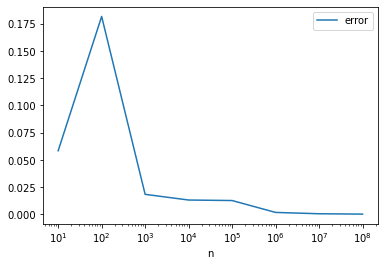

In [260]:
pi_sim.plot('n', 'error')
plt.xscale('log')

2.  To pass the time, you decide to play a game with your friends Alice and Bob. You take turns rolling a six-sided die.  Alice wins if she rolls a 6, Bob wins if he rolls a 1, and you win if you roll a 3. The game continues until someone wins. What is the probability that you win if you go first?

In [176]:
# TODO: Write out answer to the question above
# alice: 6
# bob: 1
# me: 3
# simple combinatorics question. 
# first roll i have 1/6 chance of winning
# the chance of me making it to my next chance is 5/6 (my roll) * 5/6 (bobs roll) * 5/6 (alice roll)
# (out of 6*6*6 (216) possible outcomes in 125 of them the game continues)
# ALICE ROLLS = 1 2 3 4 5 (6)
# BOB ROLLS = (1) 2 3 4 5 6
# then I have a 1/6 of rolling a winning roll again
1/6 + 5/6*5/6*5/6*1/6 + (5/6*5/6*5/6)*(5/6*5/6*5/6*1/6) + (5/6*5/6*5/6)*(5/6*5/6*5/6)*(5/6*5/6*5/6*1/6)

# or more succintly:
a = (5/6*5/6*5/6)
b = 1/6
print(1/6 + a**1*b + a**2*b + a**3*b + a**4*b + a**5*b + a**6*b + 
      a**7*b + a**8*b + a**9*b + a**10*b +a**11*b)

0.3950462644685085


3.  Implement a simulation of the game described above to verify your solution.

In [173]:
# TODO: Write out answer to the question above
from itertools import cycle
status = []
for i in range(10000):
    
    # this will ensure that every game starts with me going first
    players = cycle(['Me', 'Alice', 'Bob'])
    win_rolls = cycle([3, 6, 1])
    no_winner = True
    
    # we play every game until there is a winner
    while no_winner:
        
        # update who is playing and their roll
        player = next(players)
        win_roll = next(win_rolls)
        roll = np.random.randint(1, 7, 1)[0]
        
        # if its a win, but not for me, i lose
        if roll == win_roll and player != 'Me':
            status.append('loss')
            no_winner = False
            
        # elif its a win and is for me, i win!!
        elif roll == win_roll and player == 'Me':
            status.append('win')
            no_winner = False
            
        # otherwise we keep going
        else:
            continue
simulation = pd.DataFrame(status)
print(f"I win about {(simulation.value_counts()/simulation.shape[0])['win']*100:.2f}% of the time when I go first")

I win about 39.82% of the time when I go first
